## Importing essential libraries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
573,female,group C,high school,free/reduced,completed,50,66,64
199,female,group B,bachelor's degree,free/reduced,none,78,79,76
156,female,group E,high school,free/reduced,completed,66,74,78
273,female,group D,some college,standard,none,65,70,71
774,male,group B,some college,standard,none,66,65,60


In [22]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
total_score                    0
average                        0
dtype: int64

* Observation--> There is no missing values

In [23]:
df.duplicated().sum()

0

* Observation----> There is no Duplicate values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB


In [37]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                      81
reading score                   72
writing score                   77
total_score                    194
average                        194
dtype: int64

In [47]:
df.describe()

,math score,reading score,writing score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [39]:
df_numerical = [feature for feature in df.columns if df[feature].dtype != 'O']
df_categorical = [feature for feature in df.columns if df[feature].dtype == 'O']



In [48]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3


In [49]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Visualization of Data 


### Average score distribution 
* 1-> KDE plot
* 2-> Histogram

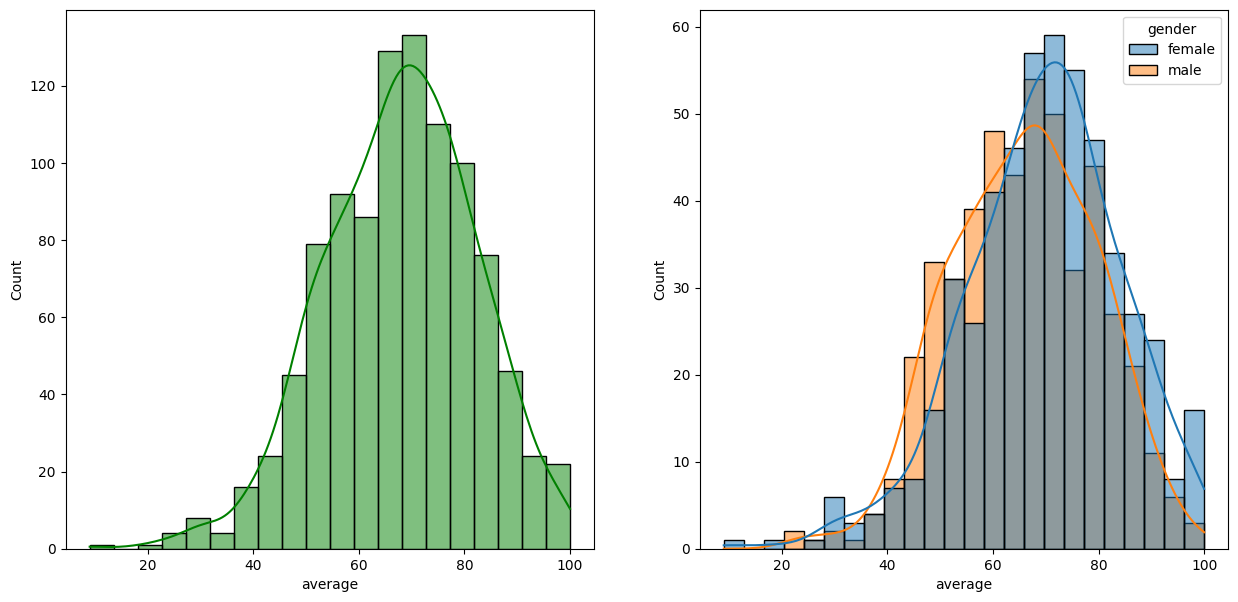

In [51]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

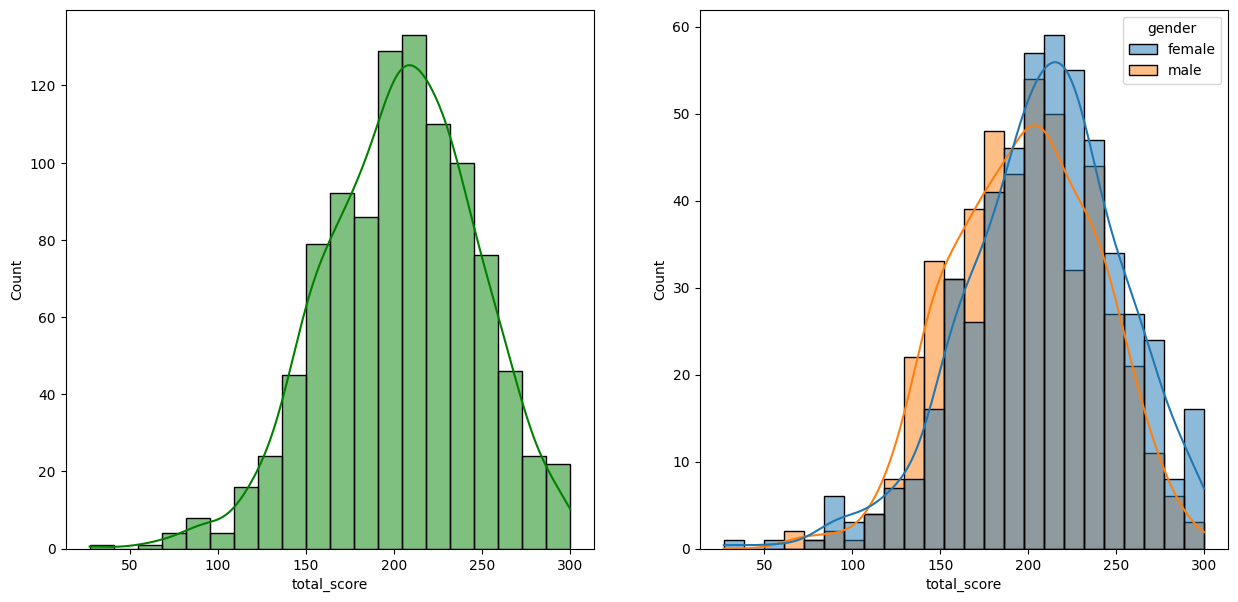

In [52]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=20,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

* Observation--> Female perform better than male

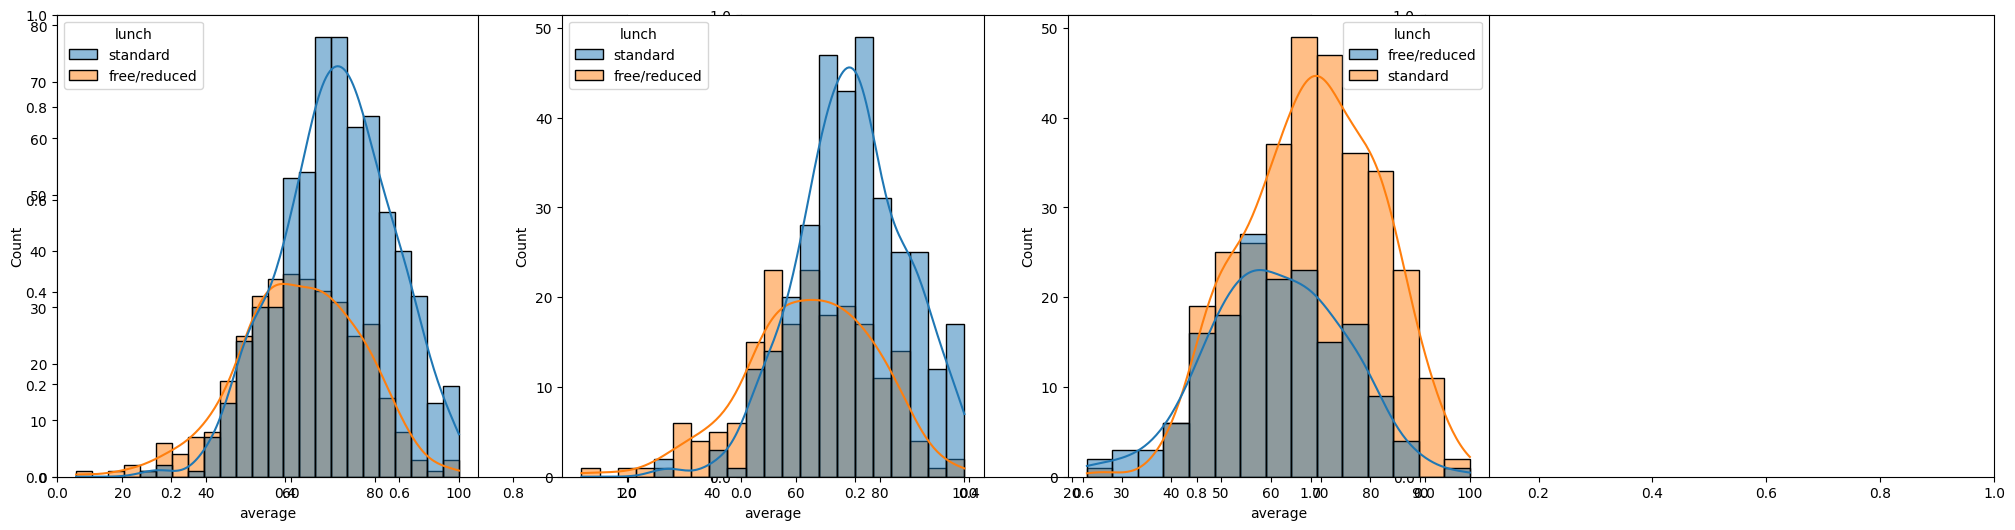

In [53]:
fig , ax = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='lunch')
plt.show();

* Observation---> Standard lunch help to score good with respect to both gender 

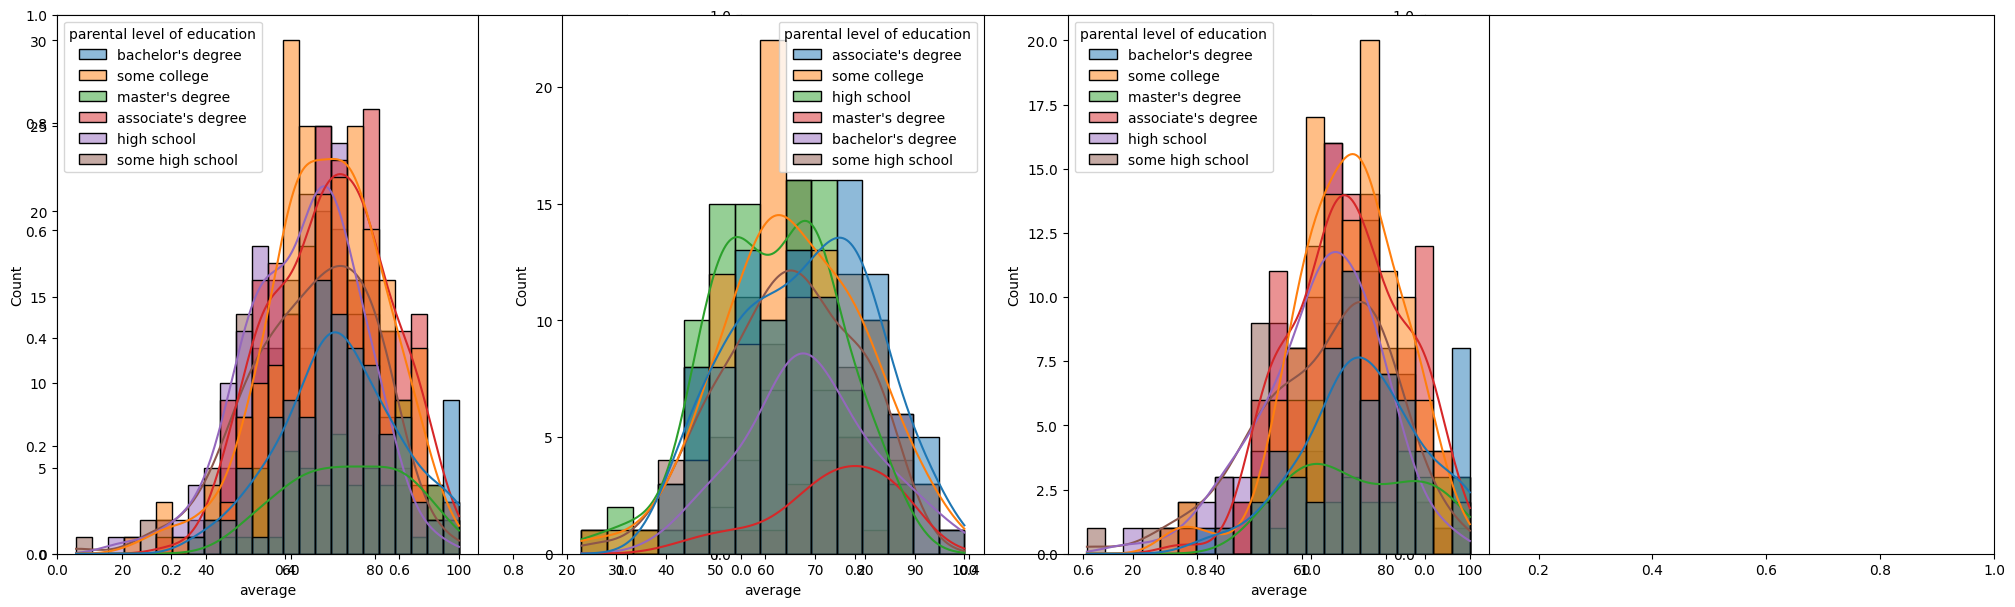

In [54]:
fig,ax = plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='parental level of education')
plt.show();

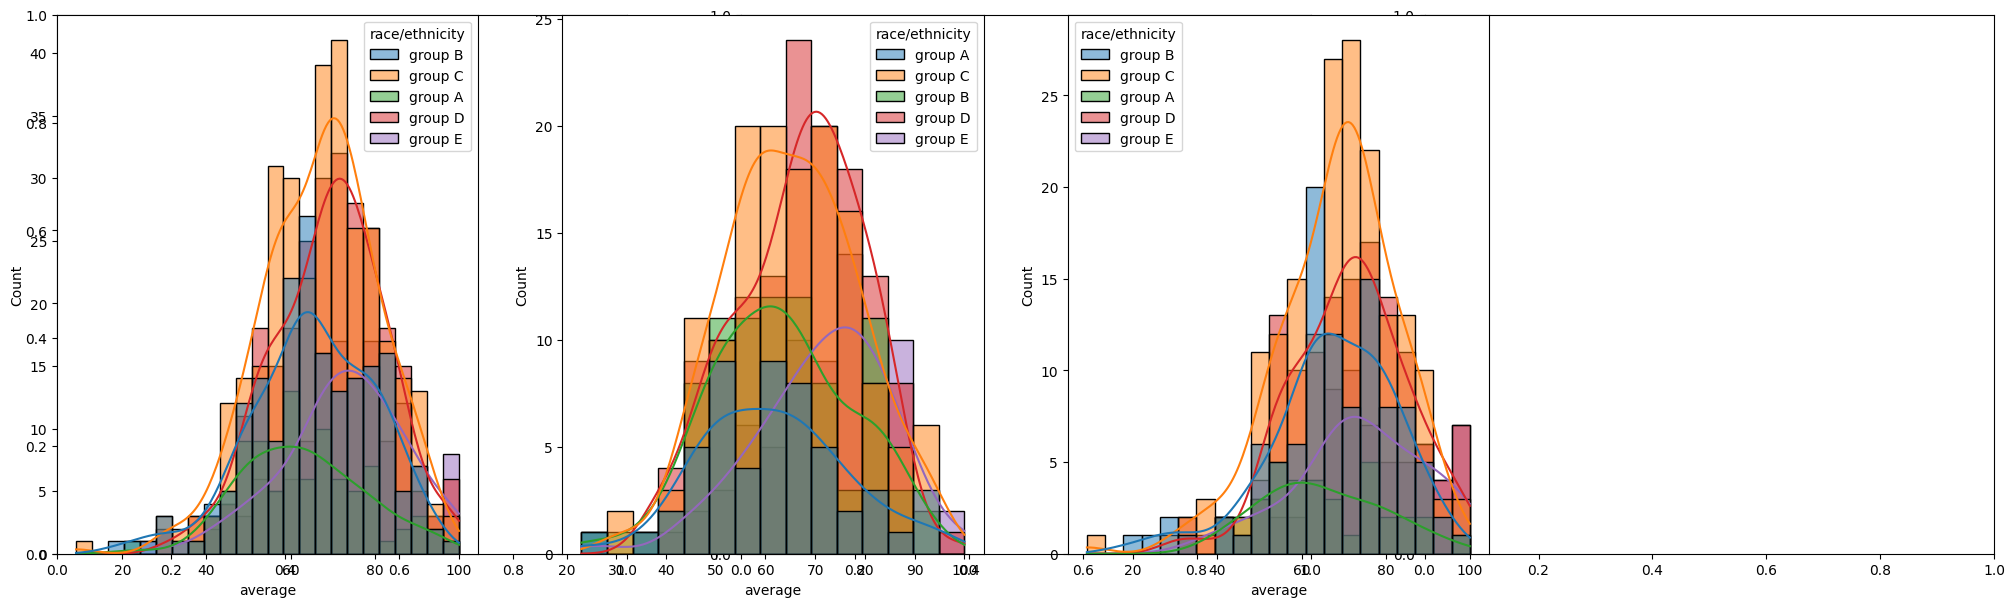

In [34]:
fig ,ax = plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',kde=True,hue='race/ethnicity')
plt.show();

* Observation--> Group A and B perform poor 

#### Maximum score of student in all three subject

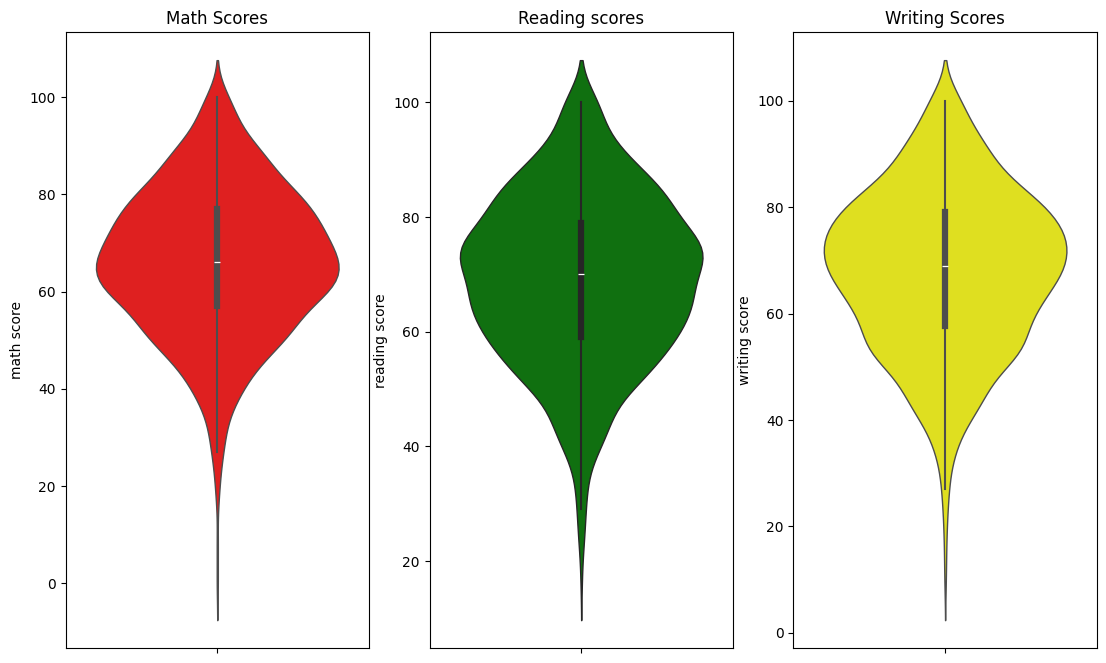

In [55]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math score',data=df,color='red',linewidth=1)
plt.subplot(1,4,2)
plt.title('Reading scores')
sns.violinplot(y='reading score',data=df,color='green',linewidth=1)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing score',data=df,color='yellow',linewidth=1)
plt.show();

* Observation---> In Maths most of the sutudent scores between 60-80
* In writing and reading most of the student scores between 50-80

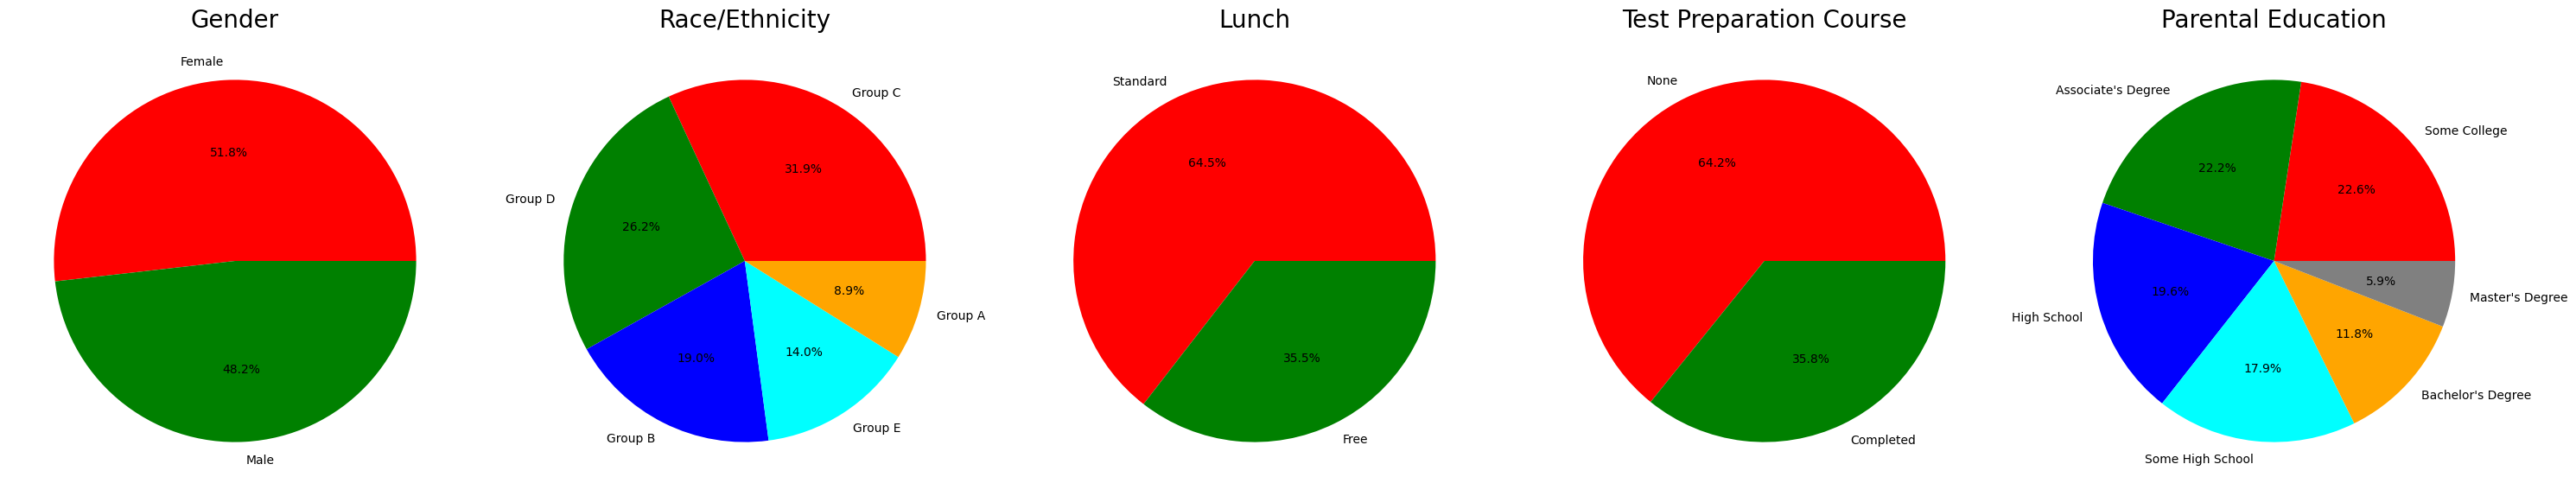

In [56]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels= 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%1.1f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C','Group D','Group B','Group E','Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,labels=labels,colors=color,autopct='%1.1f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%1.1f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels= 'None','Completed'
color= ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%1.1f%%')
plt.title('Test Preparation Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = 'Some College',"Associate's Degree","High School",'Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%1.1f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


### Features Wise Visualization

##### 1-->Gender Column
*  1---> How is distribution of Gender
*  2---> How Gender column impact on Student performance

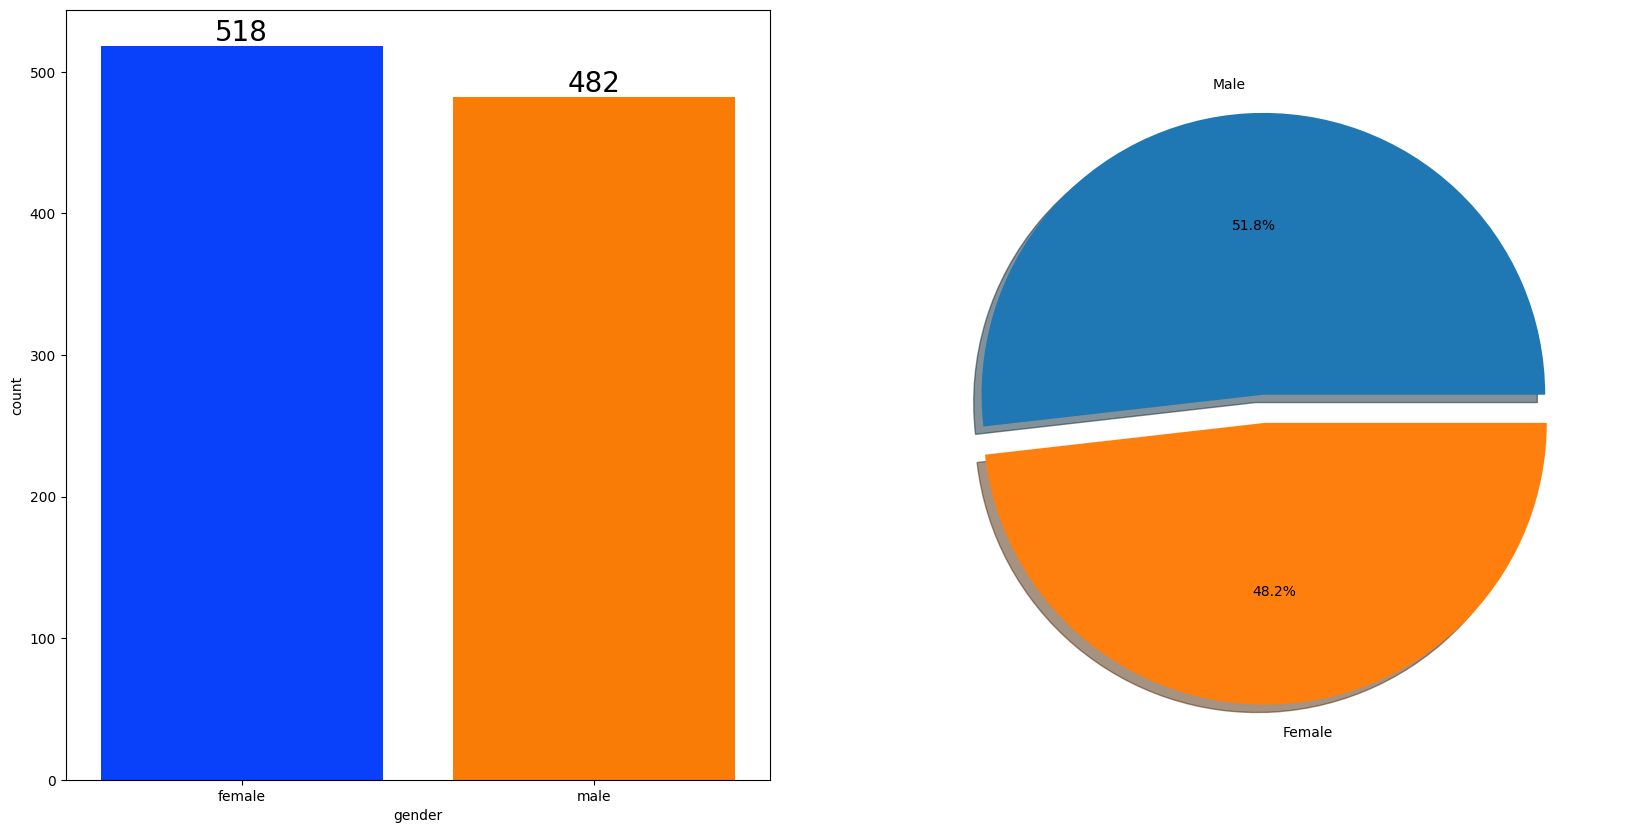

In [61]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show();

* Observation---> After Visualization Gender has balanced data

#### Bivarent Analysis(Gender vs Student Performance)

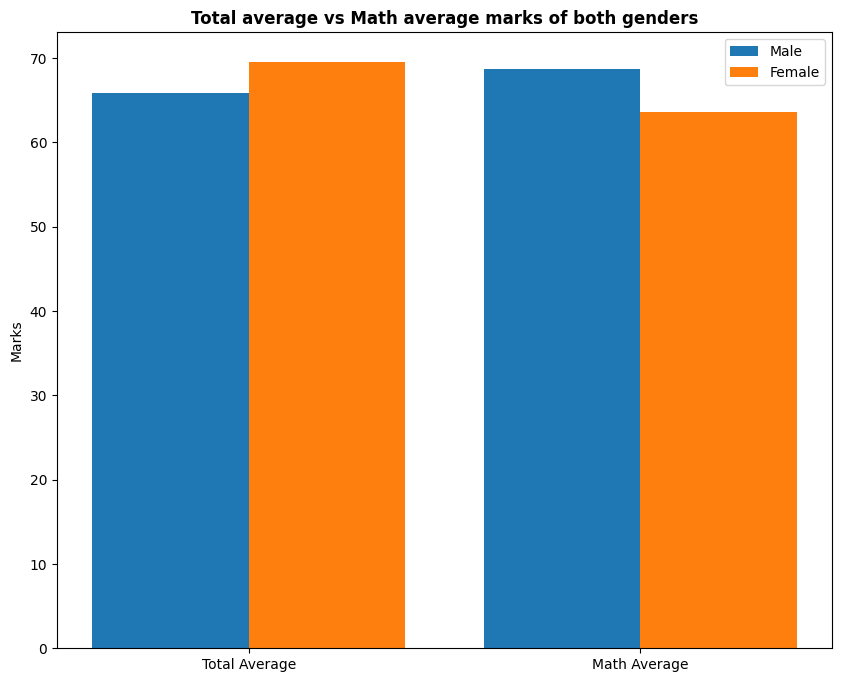

In [58]:
gender_group = df.groupby('gender')

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average'].mean().loc['female'], gender_group['math score'].mean().loc['female']]
male_scores = [gender_group['average'].mean().loc['male'], gender_group['math score'].mean().loc['male']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()


#### 3--> Race/Ethnicity column
* a--> How us distribution of race/ethnicity
* b--> How race/ethnicity impact on student performance 

##### Univarient Analysis

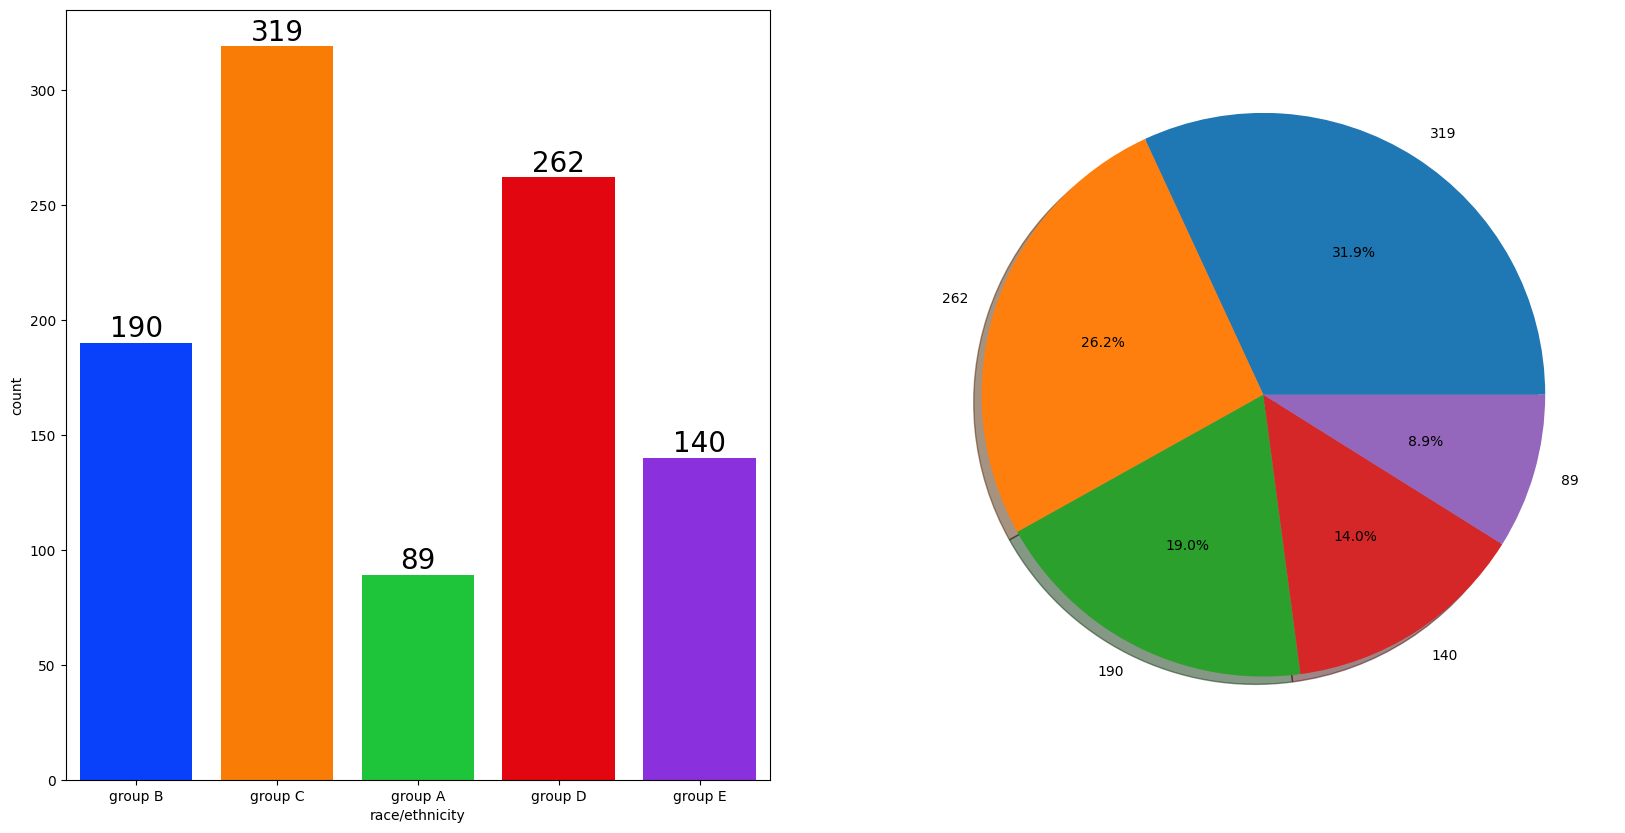

In [62]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().unique(),autopct='%1.1f%%',shadow=True)
plt.show();

#### Bivarient Analysis(Race/Ethnicity vs Student Performance)

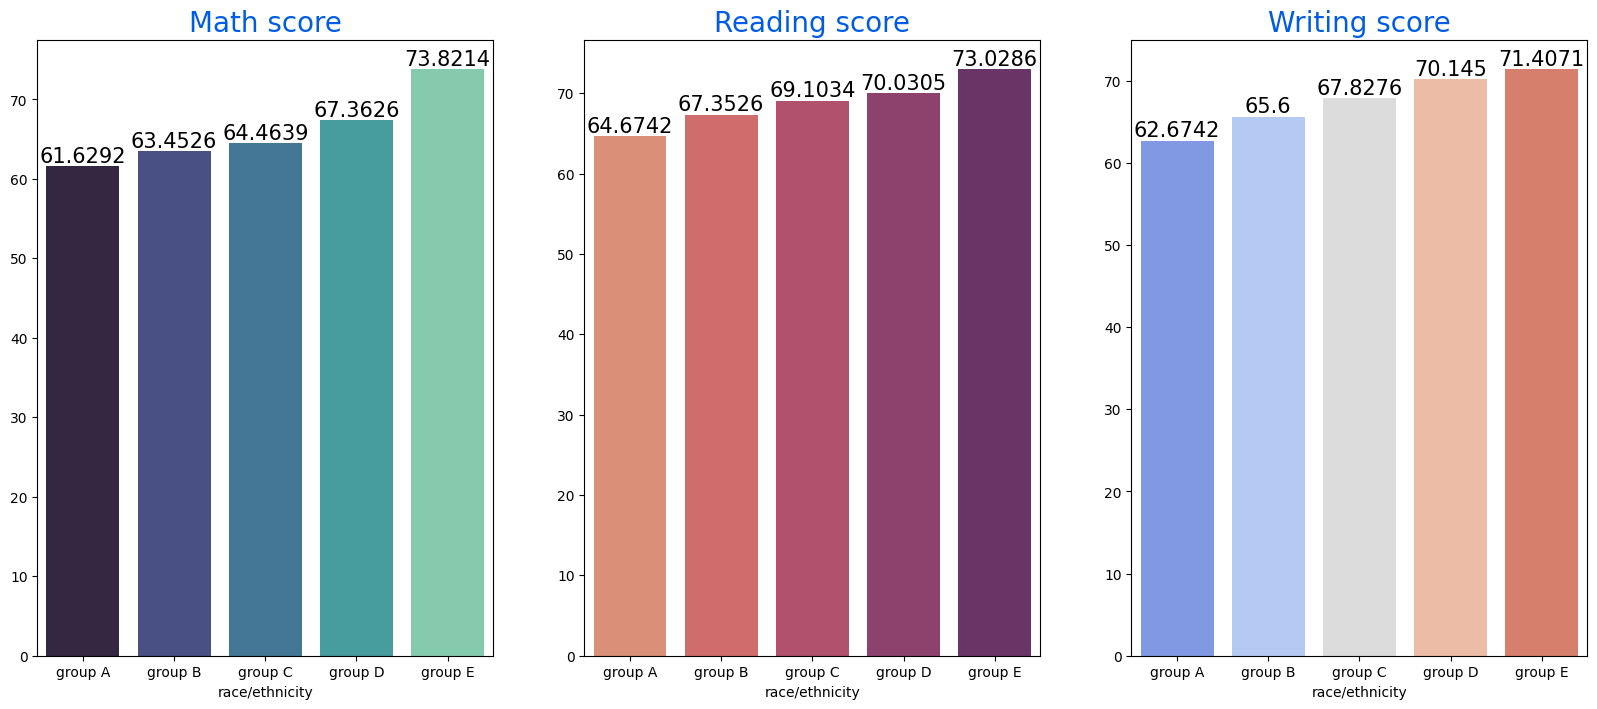

In [63]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


#### Observations 
* a--> Group E student score maximum marks
* b--> Group A student score lowest marks
* c--> Low Socioeconomics status have a lower avg score in all subject

#### Parental Education Column 
* a--> How is the distribution of data
* b--> how it impact on student performace

#### Univarient Analysis

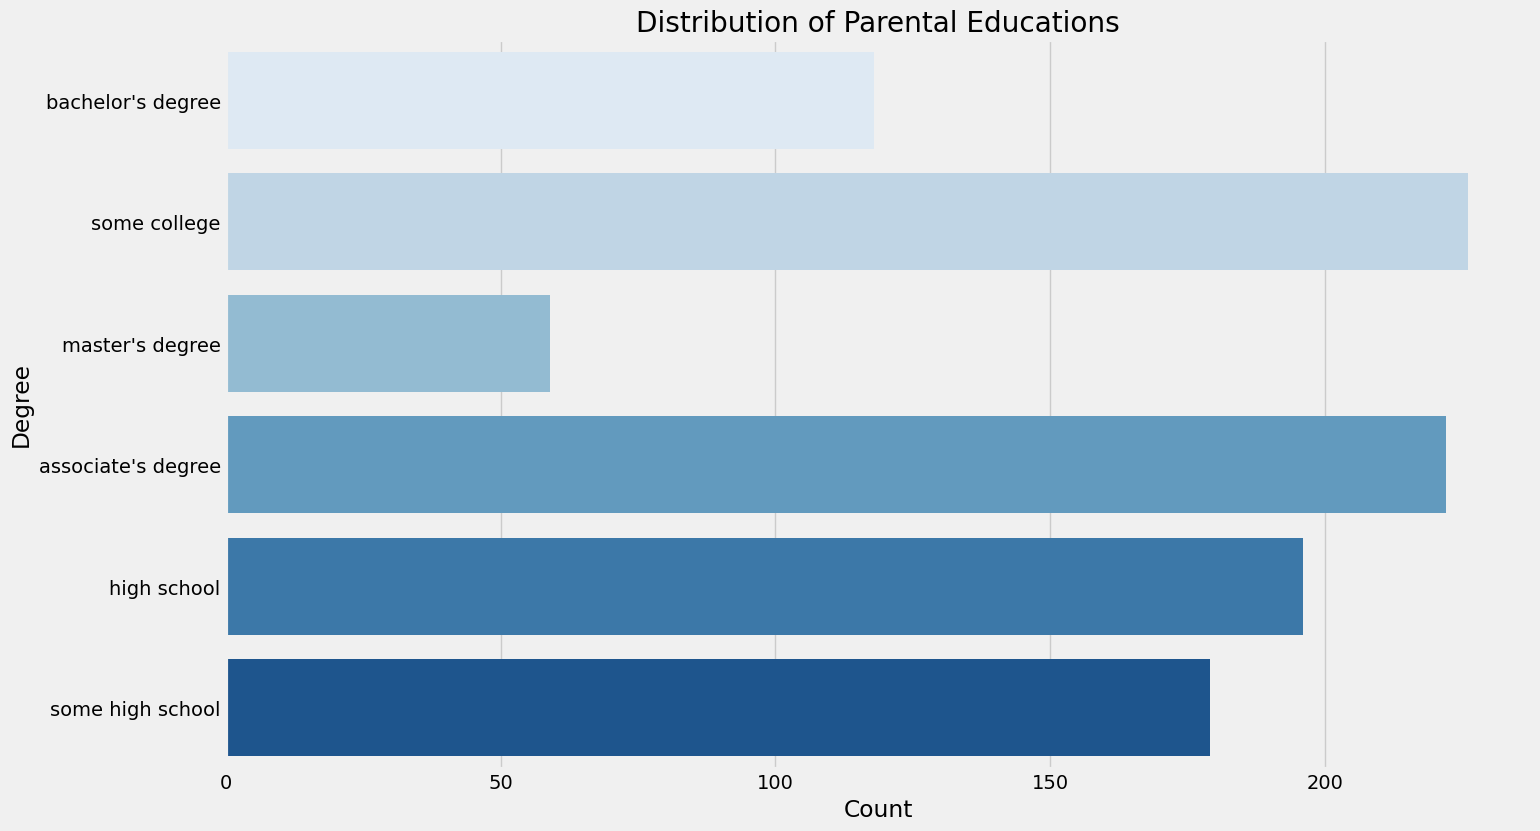

In [68]:
plt.figure(figsize=(15,9))
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'],palette='Blues')
plt.title('Distribution of Parental Educations')
plt.xlabel('Count')
plt.ylabel('Degree')
plt.show();

* Observation--> Largest student parent are from Some College

##### Multivarient Analysis(Parental Education vs Student Performace)

In [79]:
data_group2 = df.groupby('parental level of education')
plt.figure(figsize=(15,7))
data_group2.agg('mean').plot(kind='barh')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show();


#### Lunch Column
  * a-->Which type of lunch is most common amoung students ?
  * b-->What is the effect of lunch type on test results?

##### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

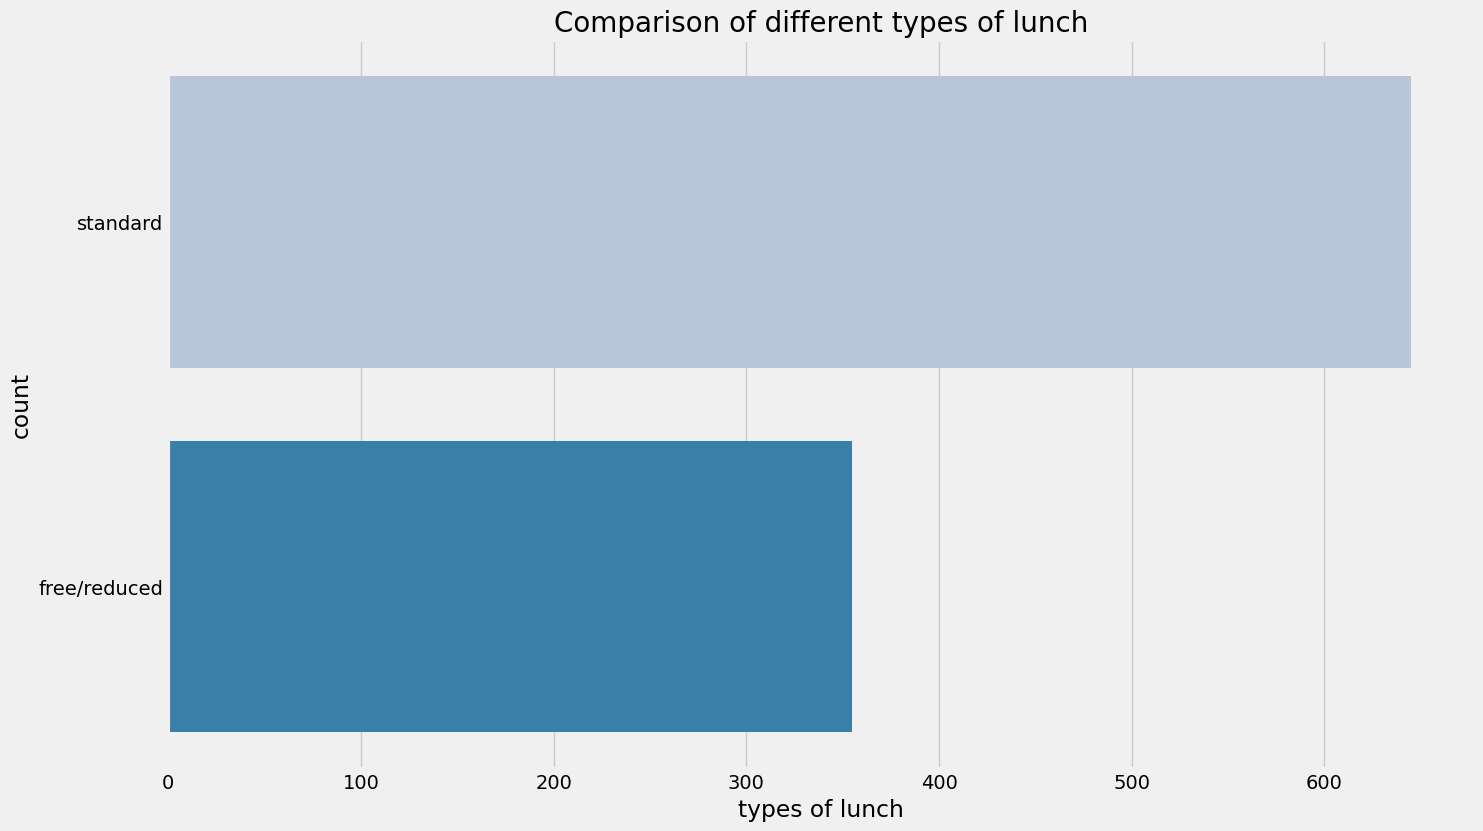

In [82]:

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

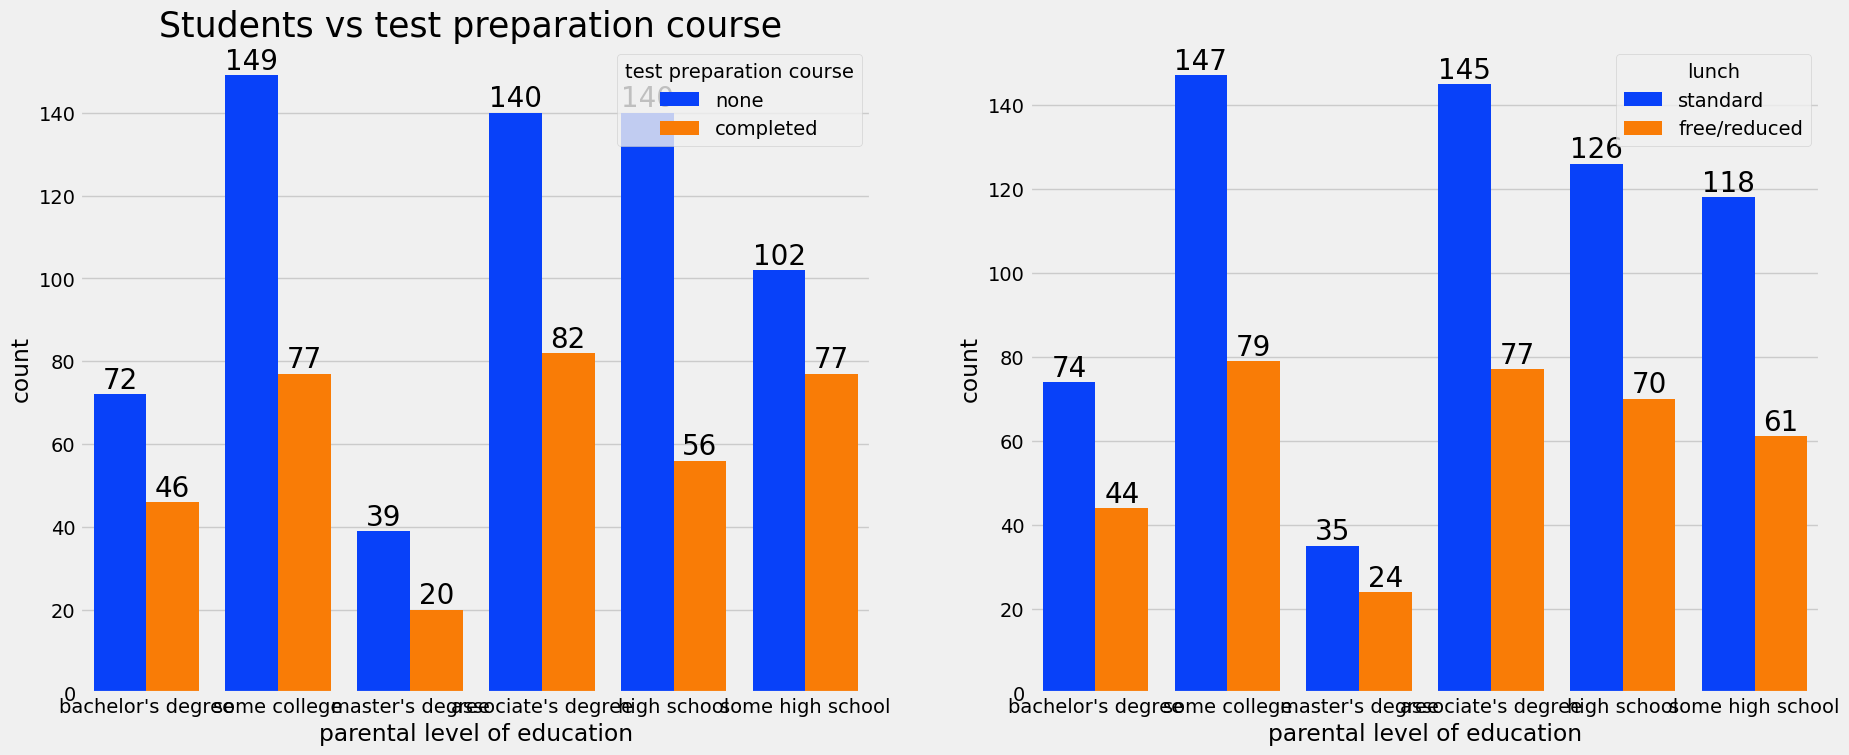

In [84]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### CHECKING OUTLIERS

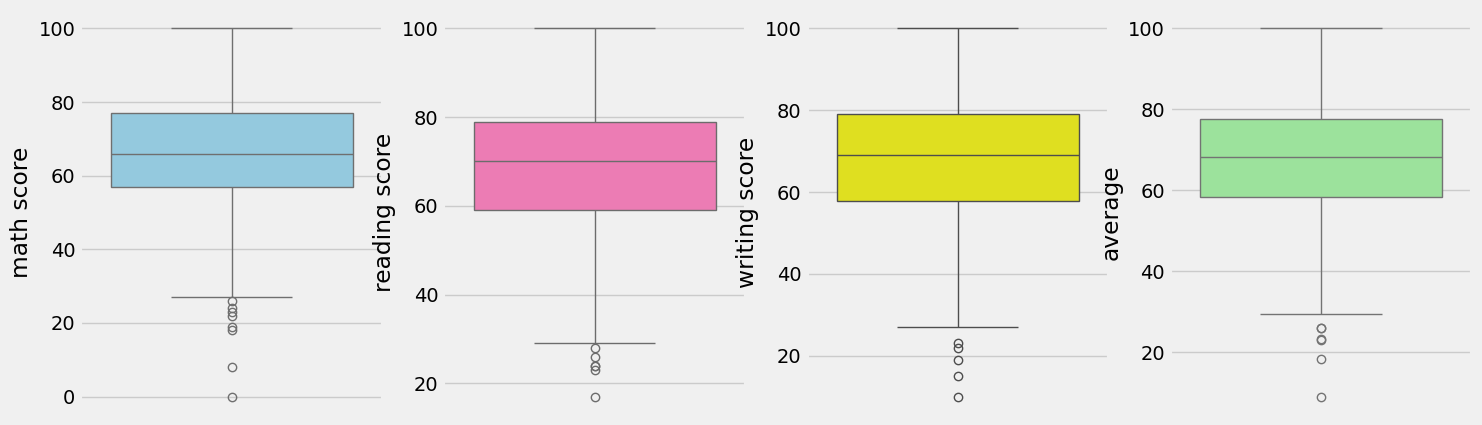

In [85]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

####  MUTIVARIATE ANALYSIS USING PAIRPLOT

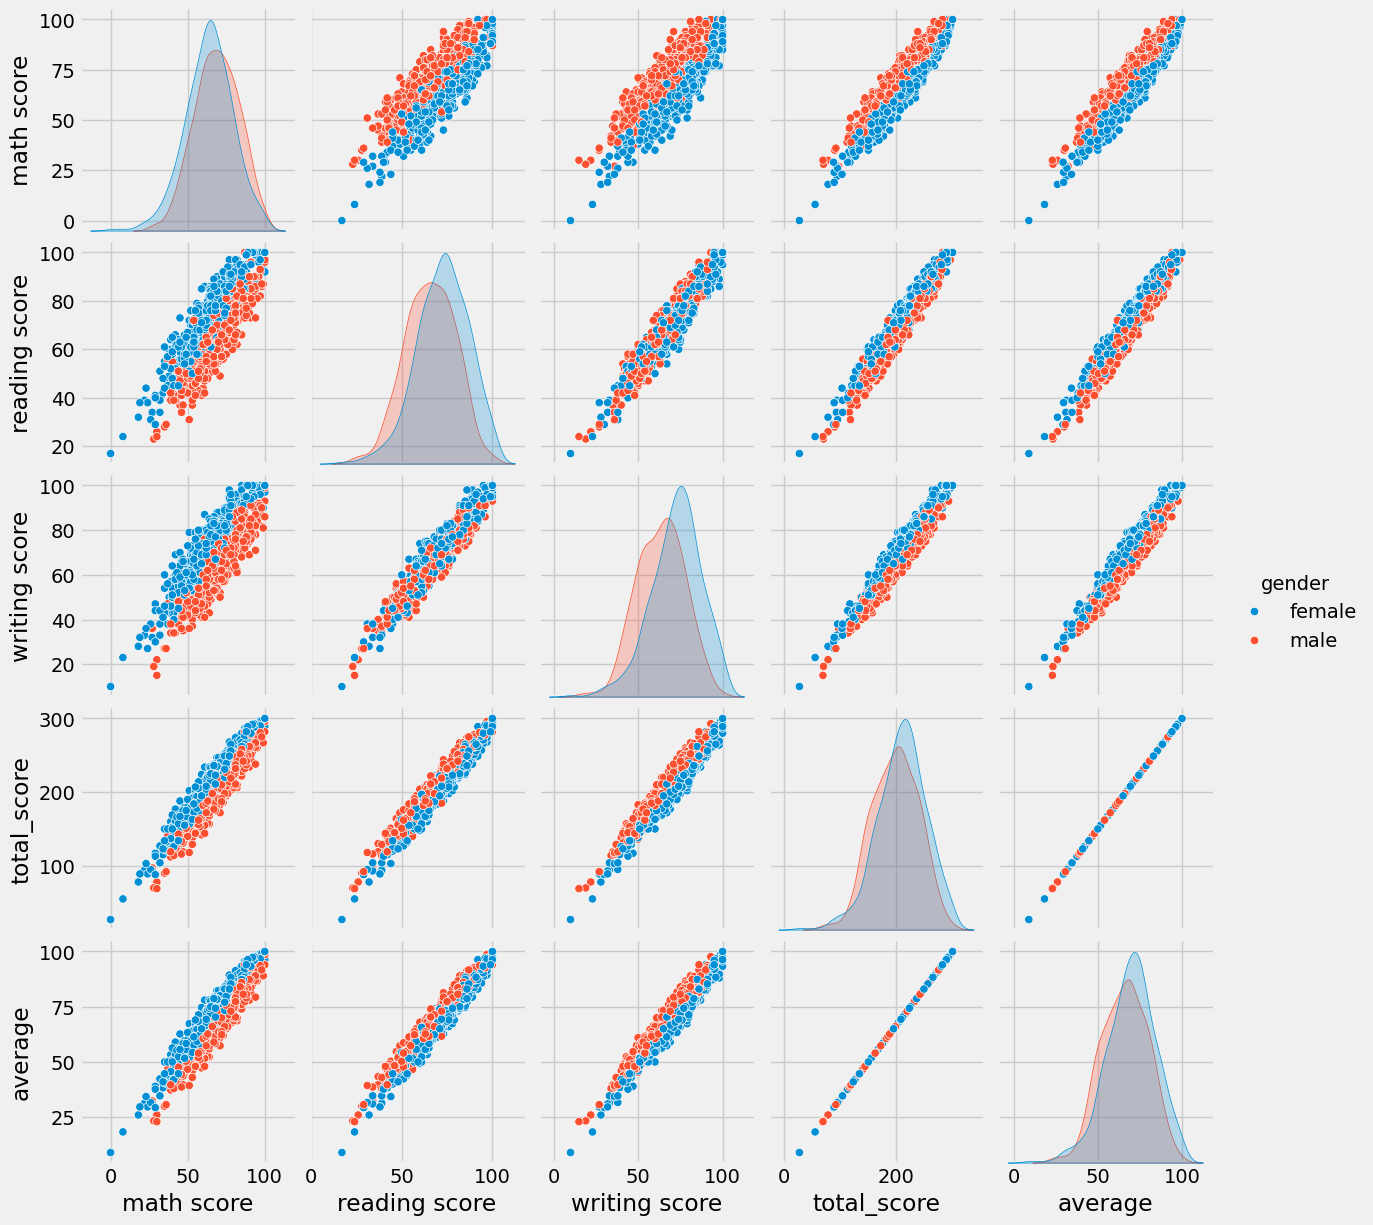

In [86]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

###  Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.